<h1>BINARY</h1>
<h1>Dataset Pre-processing</h1>


In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

<h3>Loading the original dataset</h3>

In [11]:
diabetes_binary_ds = pd.read_csv('diabetes_binary.csv')
diabetes_binary_ds.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h3>Checking for class imbalance</h3>
<h5>Target classes:</h5>
<p>0: Healthy</p>
<p>1: Diabetic/Prediabetic</p>

In [12]:
class_dist = diabetes_binary_ds["Diabetes_binary"].value_counts()
print("\n Count per Class: \n", class_dist)

class_percent = (class_dist/ diabetes_binary_ds.shape[0]) * 100
print("\n Percentage per Class: \n", class_percent)


 Count per Class: 
 0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

 Percentage per Class: 
 0.0    86.066698
1.0    13.933302
Name: Diabetes_binary, dtype: float64


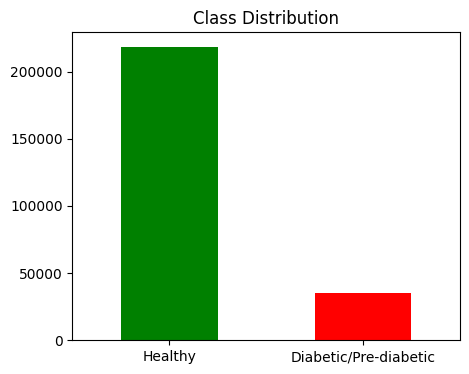

In [13]:

plt.figure(figsize=(5,4))
class_dist.plot(kind="bar", color=["green", "red"])
plt.xticks(ticks=range(len(class_dist)), labels=["Healthy", "Diabetic/Pre-diabetic"], rotation=0)
plt.title("Class Distribution")
plt.show()

<h3>Checking for missing values and labels</h3>

In [14]:
#1. check for missing target labels
missing_labels = diabetes_binary_ds["Diabetes_binary"].isnull().sum()
print('Number of missing labels: ', missing_labels)

#2. check for missing values
features = diabetes_binary_ds.drop(columns=['Diabetes_binary'])
missing_values = features.isnull().sum()
print('\nNumber of missing values: ', missing_labels)

Number of missing labels:  0

Number of missing values:  0


<h1>Data Cleaning</h1>

<p>Creating a new dataset for processing</p>

In [15]:
diabetes_binary_ds_copy = diabetes_binary_ds.copy()
diabetes_binary_ds_copy.to_csv('processed_diabetes_binary.csv', index=False)

diabetes_processed = pd.read_csv('processed_diabetes_binary.csv')

<h3>Task 1: Removing Outliers</h3>

In [16]:
# Using IsolationForest for anomaly scores and 1.5 * IQR for classifying outliers. 
# IsolationForest isolates a "tree" or data point. Depending on how quickly it is isolated, it receives an anomaly score. Fewer splits = more anomalous.
# The higher the score, the more anomalous. 
# Running in test mode it should remove +-400 outliers.
 
pre = len(diabetes_processed)
isolation_forest = IsolationForest()
isolation_forest.fit(diabetes_processed)
anomaly_scores = isolation_forest.decision_function(diabetes_processed)

Q1 = np.percentile(anomaly_scores, 25)
Q3 = np.percentile(anomaly_scores, 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = ((anomaly_scores < lower_bound) | (anomaly_scores > upper_bound))

diabetes_processed = diabetes_processed[~outlier_indices]
anomaly_scores_filtered = anomaly_scores[~outlier_indices]

num_removed = pre - len(diabetes_processed)
print(f"removed {num_removed} outliers")

253680
removed 366 outliers


In [19]:
print(len(diabetes_processed))
#dataset size after removing outliers

253314


<h3>Task 2: Scaling Features </h3>

In [20]:

def scale_continuous_features(df):
    # Find continuous features
    continuous_features = df.columns[1:]
    
    if len(continuous_features) == 0:
        print("No continuous features found in the DataFrame.")
        return df
    
    # Scale the continuous features
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[continuous_features] = scaler.fit_transform(df[continuous_features])
    
    return df_scaled

diabetes_processed = scale_continuous_features(diabetes_processed)

diabetes_processed.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571
